<a href="https://colab.research.google.com/github/doanthanhnam1/DoanThanhNam20146506/blob/main/nhan_dien_chi_tay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
from numpy import asarray
from numpy import save
from keras import preprocessing
from tensorflow.keras.utils import load_img, img_to_array

In [ ]:
data="/content/drive/MyDrive/chi_tay/"

In [ ]:
pixels,labels=list(),list()

for folder in listdir(data):
    if folder!='.DS_Store':
        #print("Folder=",folder)
        for file in listdir(data  + folder):
            if file!='.DS_Store':
                #print("File=", file)
                pixel=load_img(data  + folder +"/" + file,target_size=(280,280))
                pixel=img_to_array(pixel)
                pixels.append(pixel)
                labels.append( folder)

pixels =asarray(pixels)
labels =asarray(labels)#.reshape(-1,1)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
import pickle
from sklearn.model_selection import train_test_split
encoder = LabelBinarizer()
labels = encoder.fit_transform(labels)
#print(labels)

file = open('pix.data', 'wb')
# dump information to that file
pickle.dump((pixels,labels), file)
# close the file
file.close()

In [ ]:
def load_data():
    file = open('pix.data', 'rb')
    # dump information to that file
    (pixels, labels) = pickle.load(file)
    # close the file
    file.close()
    return pixels, labels

#save_data()
X,y = load_data()
#random.shuffle(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(56, 280, 280, 3)
(14, 280, 280, 3)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from numpy.ma.core import reshape

In [ ]:
X_train= X_train.astype('float32')/255
print(y_train.shape)
X_test= X_test.astype('float32')/255

(56, 5)


In [ ]:
from keras import models 
from keras.models import Sequential,Model
from keras import Input
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization
from keras.optimizers import Adam
batch_size=50 #lô
epochs=20     #số lần học
classes=5    #phân loại

In [ ]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(280,280,3),padding='same'))
from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
#so lan tich chap
model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

In [ ]:
model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

In [ ]:
from keras import optimizers
from keras import losses
model.add(Flatten())
model.add(Dense(1000,activation='linear'))
model.add(Dense(500,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))
model.compile(loss=losses.categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
model.summary()
train=model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 280, 280, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 280, 280, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 140, 140, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 140, 140, 64)      18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 140, 140, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 70, 70, 64)       0         
 2D)                                                    

In [ ]:
train=model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/20
2/2 [==============================] - 0s 68ms/step - loss: 0.4974 - accuracy: 0.8214
Epoch 2/20
2/2 [==============================] - 0s 63ms/step - loss: 0.3720 - accuracy: 0.8929
Epoch 3/20
2/2 [==============================] - 0s 85ms/step - loss: 0.3917 - accuracy: 0.9286
Epoch 4/20
2/2 [==============================] - 0s 60ms/step - loss: 0.3788 - accuracy: 0.9643
Epoch 5/20
2/2 [==============================] - 0s 61ms/step - loss: 0.3521 - accuracy: 0.9286
Epoch 6/20
2/2 [==============================] - 0s 60ms/step - loss: 0.2794 - accuracy: 0.9643
Epoch 7/20
2/2 [==============================] - 0s 60ms/step - loss: 0.2062 - accuracy: 0.9643
Epoch 8/20
2/2 [==============================] - 0s 61ms/step - loss: 0.1761 - accuracy: 0.9464
Epoch 9/20
2/2 [==============================] - 0s 61ms/step - loss: 0.2783 - accuracy: 0.9643
Epoch 10/20
2/2 [==============================] - 0s 61ms/step - loss: 0.3235 - accuracy: 0.9107
Epoch 11/20
2/2 [============

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/BT/nhan_dien_chi_tay.h5")

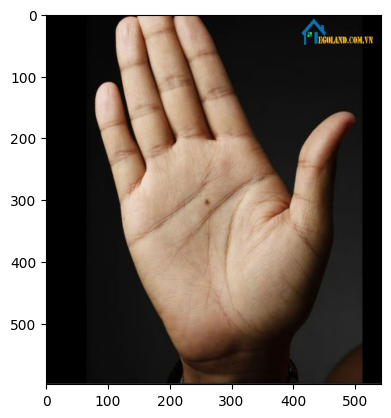

In [ ]:
from keras.saving.saving_lib import load_model
import matplotlib.pyplot as plt
from keras.models import load_model
model100=load_model("/content/drive/MyDrive/Colab Notebooks/BT/nhan_dien_chi_tay.h5")
img=load_img('/content/drive/MyDrive/AI/test5/bantay1.jpg')
plt.imshow(img)
plt.show()

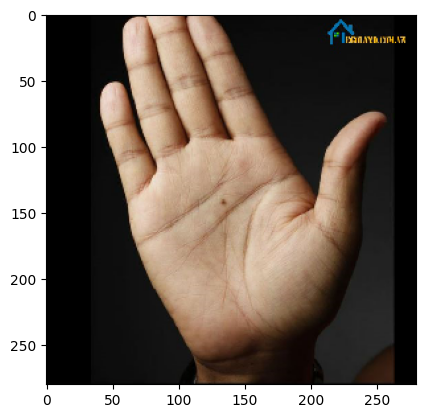

In [ ]:
img = load_img('/content/drive/MyDrive/AI/test5/bantay1.jpg',target_size=(280,280))
plt.imshow(img)

In [ ]:
import numpy as np
class_name = ['vanmenh1','vanmenh2','vanmenh3','vanmenh4','vanmenh5']
img1=img_to_array(img)
img1=img1.reshape(1,280,280,3)
img1=img1.astype('float32')
img1=img1/255
predict = model100.predict(img1)

print("This picture is: ", class_name[np.argmax(predict[0])], (predict[0]))
print(np.argmax(predict[0]))
print(np.max(predict[0],axis=0))

1/1 [==============================] - 0s 92ms/step
This picture is:  vanmenh3 [3.8949553e-02 2.3601572e-03 9.5544177e-01 2.5528513e-03 6.9561822e-04]
2
0.9554418


khó có thể khống chế được ham muốn tình dục của bản thân
biến thái hoặc đa phần là người có tính cách hay lừa gạt
thể hiện tình cảm quá lộ liễu
đào hoa và có nhiều người yêu. Nhưng lại không có các mối quan hệ nghiêm túc 
Tại một thời điểm trong cuộc sống, phải hy sinh lợi ích của mình cho người khác


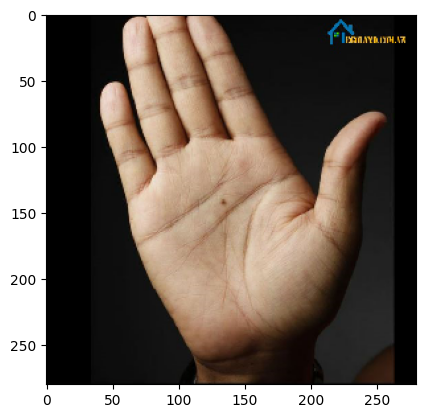

In [ ]:
plt.imshow(img)
if np.argmax(predict[0])==1:
  print("Là người có sức sống, sức khỏe dồi dào, độ lượng, hào phóng")
  print("Tính tình rộng rãi, cởi mở, hòa đồng")
  print("Có nhiều ước mơ, tham vọng, tự tin")
  print("Thần kinh vững vàng, sáng suốt, ít bệnh tật")
  print("giàu sinh lực")
  print("Tình cảm sâu sắc, bền bỉ, say mê")
  print("Cuộc đời khá dễ dàng, phẳng lặng")
  

elif np.argmax(predict[0])==3:
  print("Đề phòng tai nạn, bệnh tật bất ngờ")
  print("Thời nhỏ sống dựa vào cha mẹ nhiều, hơi kém phát triển")
  print("Thiếu nghị lực, hơi nhẹ dạ")
  print("Tình cảm không sâu, không nhiệt tình")
  print(" sẽ phải nhập viện hoặc bị thương")
  print("Có sự thay đổi tốt hoặc xấu, đề phòng bị mất trộm, lừa đảo")
  print("Cuộc đời bấp bênh, nhiều thay đổi")

elif np.argmax(predict[0])==2:
  print("khó có thể khống chế được ham muốn tình dục của bản thân")
  print("biến thái hoặc đa phần là người có tính cách hay lừa gạt")
  print("thể hiện tình cảm quá lộ liễu")
  print("đào hoa và có nhiều người yêu. Nhưng lại không có các mối quan hệ nghiêm túc ")
  print("Tại một thời điểm trong cuộc sống, phải hy sinh lợi ích của mình cho người khác")

elif np.argmax(predict[0])==4:
  print("là người biết cách điều khiển cảm xúc")
  print("Người dễ rung động trong tình cảm")
  print(" hết lòng trong cuộc sống tình cảm")
  print("Người dễ bị tổn thương")
  print("hay bị người khác điều khiển và chi phối")
  print("hoàn toàn bị kiểm soát bởi định mệnh")

elif np.argmax(predict[0])==5:
  print("là người rất sáng tạo trong công việc và đời sống")
  print("thích mạo hiểm, có niềm đam mê với cuộc sống")
  print("hay đưa quyết định quan trọng")
  print("tràn trề năng lượng")
  print("luôn khoẻ mạnh và nhiệt huyết trong công việc và cuộc sống")
  print("Hãy chú ý cận thận trong chuyện tình cảm")











